In [5]:
from model import Net
from utils import get_dst_device, print_model_summary
device = get_dst_device()
model = Net().to(device)
print_model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


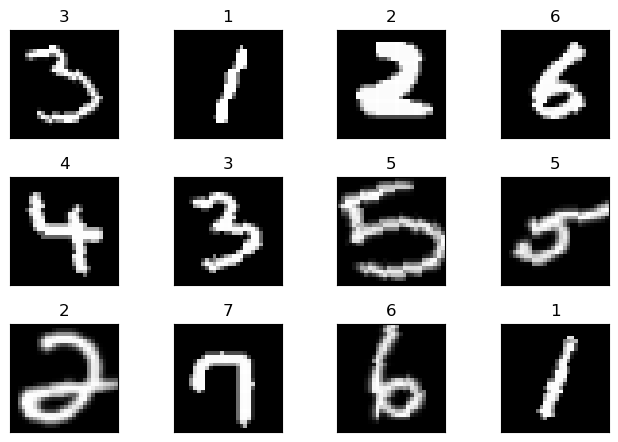

In [6]:
from utils import setup_test_loader, setup_train_loader, plot_data
train_loader = setup_train_loader("../data")
test_loader = setup_test_loader("../data")
plot_data(train_loader)

In [7]:
import torch.optim as optim
import torch.nn.functional as F
from utils import train_model, test_model
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20
train_loss_per_epoch = []
test_loss_per_epoch = []
train_accuracy_per_epoch = []
test_accuracy_per_epoch = []
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  [train_accuracy, train_loss] = train_model(model, device, train_loader, optimizer, criterion)
  train_accuracy_per_epoch.append(train_accuracy)
  train_loss_per_epoch.append(train_loss)

  [test_accuracy, test_loss] = test_model(model, device, test_loader, criterion)
  test_accuracy_per_epoch.append(train_accuracy)
  test_loss_per_epoch.append(train_loss)

  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.4064 Batch_id=117 Accuracy=53.04: 100%|██████████| 118/118 [01:16<00:00,  1.54it/s]


Test set: Average loss: 0.2570, Accuracy: 9222/10000 (92.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2032 Batch_id=117 Accuracy=93.56: 100%|██████████| 118/118 [01:17<00:00,  1.52it/s]


Test set: Average loss: 0.0900, Accuracy: 9711/10000 (97.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1310 Batch_id=117 Accuracy=96.22: 100%|██████████| 118/118 [01:17<00:00,  1.52it/s]


Test set: Average loss: 0.0650, Accuracy: 9816/10000 (98.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1151 Batch_id=117 Accuracy=97.06: 100%|██████████| 118/118 [01:18<00:00,  1.50it/s]


Test set: Average loss: 0.0501, Accuracy: 9829/10000 (98.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0522 Batch_id=117 Accuracy=97.44: 100%|██████████| 118/118 [01:17<00:00,  1.52it/s]


Test set: Average loss: 0.0476, Accuracy: 9859/10000 (98.59%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0734 Batch_id=117 Accuracy=97.76: 100%|██████████| 118/118 [01:17<00:00,  1.53it/s]


Test set: Average loss: 0.0421, Accuracy: 9870/10000 (98.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0168 Batch_id=117 Accuracy=97.96: 100%|██████████| 118/118 [01:15<00:00,  1.56it/s]


Test set: Average loss: 0.0365, Accuracy: 9880/10000 (98.80%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0159 Batch_id=117 Accuracy=98.17: 100%|██████████| 118/118 [01:16<00:00,  1.54it/s]


Test set: Average loss: 0.0324, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0315 Batch_id=117 Accuracy=98.34: 100%|██████████| 118/118 [01:16<00:00,  1.54it/s]


Test set: Average loss: 0.0320, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0133 Batch_id=117 Accuracy=98.39: 100%|██████████| 118/118 [01:17<00:00,  1.53it/s]


Test set: Average loss: 0.0282, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0413 Batch_id=117 Accuracy=98.56: 100%|██████████| 118/118 [01:17<00:00,  1.53it/s]


Test set: Average loss: 0.0256, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0789 Batch_id=117 Accuracy=98.60: 100%|██████████| 118/118 [01:15<00:00,  1.55it/s]


Test set: Average loss: 0.0286, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0572 Batch_id=117 Accuracy=98.70: 100%|██████████| 118/118 [01:16<00:00,  1.53it/s]


Test set: Average loss: 0.0272, Accuracy: 9901/10000 (99.01%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0095 Batch_id=117 Accuracy=98.73: 100%|██████████| 118/118 [01:17<00:00,  1.51it/s]


Test set: Average loss: 0.0239, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0026 Batch_id=117 Accuracy=98.83: 100%|██████████| 118/118 [01:22<00:00,  1.43it/s]


Test set: Average loss: 0.0224, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0836 Batch_id=117 Accuracy=99.07: 100%|██████████| 118/118 [01:19<00:00,  1.49it/s]


Test set: Average loss: 0.0203, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0051 Batch_id=117 Accuracy=99.12: 100%|██████████| 118/118 [01:15<00:00,  1.55it/s]


Test set: Average loss: 0.0200, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0099 Batch_id=117 Accuracy=99.13: 100%|██████████| 118/118 [01:15<00:00,  1.55it/s]


Test set: Average loss: 0.0196, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0754 Batch_id=117 Accuracy=99.12: 100%|██████████| 118/118 [01:16<00:00,  1.55it/s]


Test set: Average loss: 0.0199, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0302 Batch_id=117 Accuracy=99.10: 100%|██████████| 118/118 [01:15<00:00,  1.55it/s]


Test set: Average loss: 0.0200, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-03.


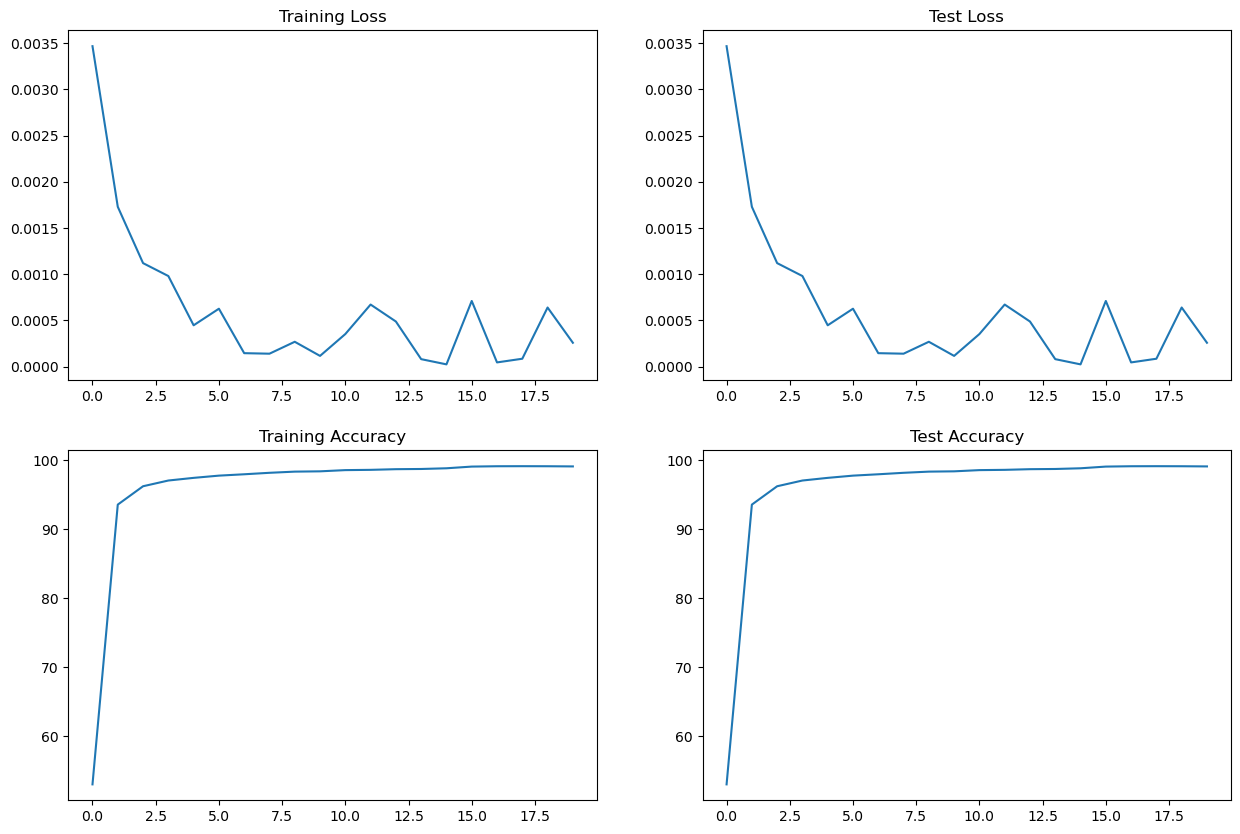

In [8]:
from utils import plot_results
plot_results(train_accuracy_per_epoch, train_loss_per_epoch, test_accuracy_per_epoch, test_loss_per_epoch)